In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# load and split dataset
data_dir = "dataset/digits updated"
categories = os.listdir(data_dir)
print(categories)
print(os.path.isdir(os.path.join(data_dir,categories[0])))
print(os.path.isdir(os.path.join(data_dir,categories[1])))

['.DS_Store', '9', '0', '7', '6', '1', '8', '4', '3', '2', '5']
False
True


In [3]:
X = []
y = []

# Loop through folders
for label, class_name in enumerate(os.listdir(data_dir)):
    #print(label, class_name)
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue
    for file in os.listdir(class_path):
        img_path = os.path.join(class_path, file)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            X.append(img)  
            y.append(class_name)
        except:
            continue

1
(10160, 128, 128)


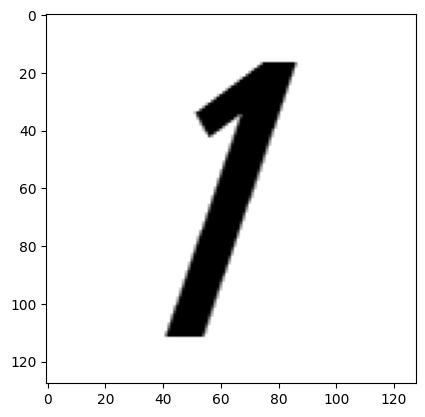

In [4]:
x=np.array(X)
y=np.array(y)
plt.imshow(x[4609],cmap='gray')
print(y[4609])
print(x.shape)

In [7]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
hog = cv2.HOGDescriptor()
x_feat_train = []
for img in x_train:
    h = hog.compute(img)
    #print(h.shape)
    x_feat_train.append(h)
x_feat_train = np.array(x_feat_train)


x_feat_test = []
for img in x_test:
    h = hog.compute(img)
    #print(h.shape)
    x_feat_test.append(h)
x_feat_test = np.array(x_feat_test)
#print(x_feat_train.shape)

(2032,)
(2032,)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       206
           1       0.96      0.99      0.97       201
           2       0.99      0.99      0.99       200
           3       0.98      0.92      0.95       198
           4       1.00      0.97      0.98       203
           5       0.97      0.99      0.98       196
           6       0.98      0.94      0.96       217
           7       0.99      1.00      0.99       200
           8       0.97      0.94      0.95       190
           9       0.99      0.97      0.98       221

    accuracy                           0.97      2032
   macro avg       0.97      0.97      0.97      2032
weighted avg       0.97      0.97      0.97      2032



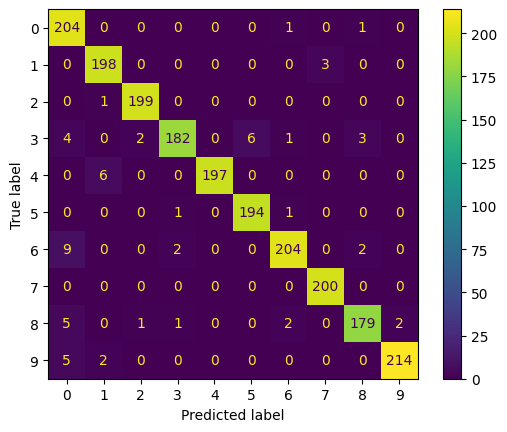

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_feat_train, y_train)
y_pred = knn.predict(x_feat_test)
print(y_pred.shape)
print(y_test.shape)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
